#Output variable -> y

y -> Whether the client has subscribed a term deposit or not

Binomial ("yes" or "no")

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Calclate accuracy and confussion matrix
import statsmodels.api as sm
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("bank-full (1).csv")
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [ ]:
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.drop(['contact', 'day'],axis=1, inplace=True)

In [ ]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,may,151,1,-1,0,unknown,no


In [ ]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [ ]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [ ]:
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [ ]:
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [ ]:
df['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [ ]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [ ]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
df['housing']=df['housing'].astype('category')
df['housing']=df['housing'].cat.codes

In [ ]:
df['marital']=df['marital'].astype('category')
df['marital']=df['marital'].cat.codes

In [ ]:
df['education']=df['education'].astype('category')
df['education']=df['education'].cat.codes

In [ ]:
df['default']=df['default'].astype('category')
df['default']=df['default'].cat.codes

In [ ]:
df['loan']=df['loan'].astype('category')
df['loan']=df['loan'].cat.codes

In [ ]:
df['poutcome']=df['poutcome'].astype('category')
df['poutcome']=df['poutcome'].cat.codes

In [ ]:
df['y']=df['y'].astype('category')
df['y']=df['y'].cat.codes

In [ ]:
df['job']=df['job'].astype('category')
df['job']=df['job'].cat.codes

In [ ]:
df['month']=df['month'].astype('category')
df['month']=df['month'].cat.codes

In [ ]:
df.head()

,age,marital,education,default,balance,housing,loan,month,duration,campaign,pdays,previous,poutcome,y
0,58,1,2,0,2143,1,0,8,261,1,-1,0,3,0
1,44,2,1,0,29,1,0,8,151,1,-1,0,3,0
2,33,1,1,0,2,1,1,8,76,1,-1,0,3,0
3,47,1,3,0,1506,1,0,8,92,1,-1,0,3,0
4,33,2,3,0,1,0,0,8,198,1,-1,0,3,0


# Exploratory Data Analysis

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

<Axes: xlabel='y', ylabel='age'>

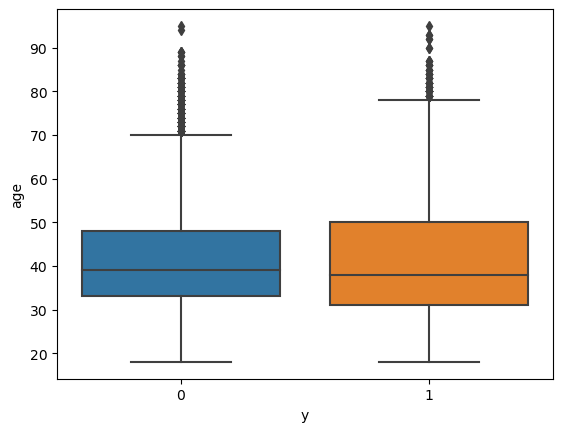

In [ ]:
sns.boxplot(x=df['y'],y=df['age'])

In [ ]:
pd.crosstab(index=df['Gender'],
           columns=df['Target'],
           values = df['Target'],
           aggfunc='count')

<Axes: xlabel='y', ylabel='job'>

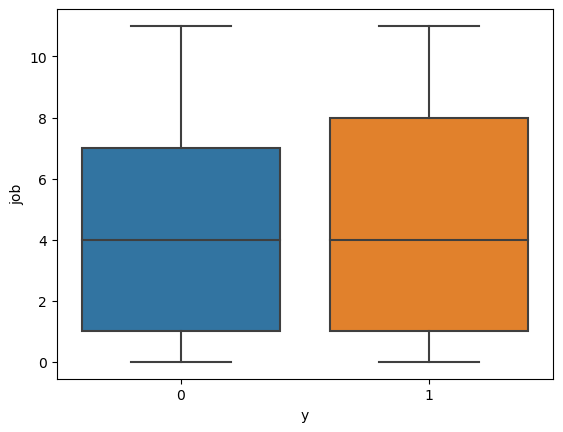

In [ ]:
sns.boxplot(x=df['y'],y=df['job'])

In [ ]:
ct_job = pd.crosstab(index=df['job'],
           columns=df['y'],
           values=df['y'],
           aggfunc='count',
        normalize='index').round(3)
ct_job

y,0,1
job,,
0,0.878,0.122
1,0.927,0.073
2,0.917,0.083
3,0.912,0.088
4,0.862,0.138
5,0.772,0.228
6,0.882,0.118
7,0.911,0.089
8,0.713,0.287


<Axes: xlabel='marital', ylabel='y'>

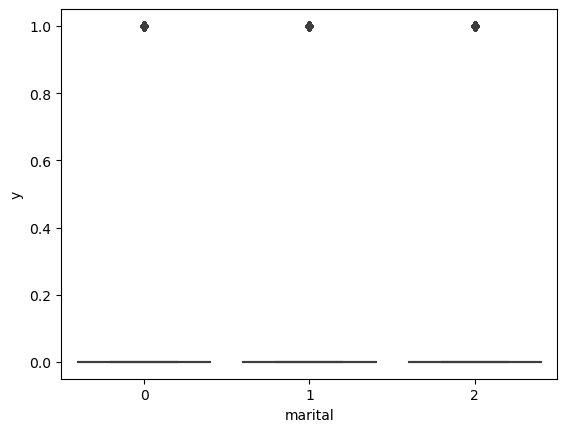

In [ ]:
sns.boxplot(x=df['marital'],y=df['y'])

In [ ]:
ct_marital= pd.crosstab(index=df['marital'],
           columns=df['y'],
           values=df['y'],
           aggfunc='count',
        normalize='index').round(3)
ct_marital

y,0,1
marital,,
0,0.881,0.119
1,0.899,0.101
2,0.851,0.149


<Axes: xlabel='marital'>

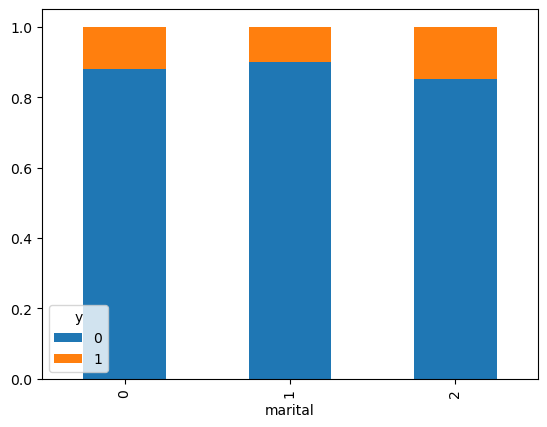

In [ ]:
ct_marital.plot(kind='bar',stacked=True)

In [ ]:
ct_eud= pd.crosstab(index=df['education'],
           columns=df['y'],
           values=df['y'],
           aggfunc='count',
        normalize='index').round(3)
ct_eud

y,0,1
education,,
0,0.914,0.086
1,0.894,0.106
2,0.850,0.150
3,0.864,0.136


<Axes: xlabel='education'>

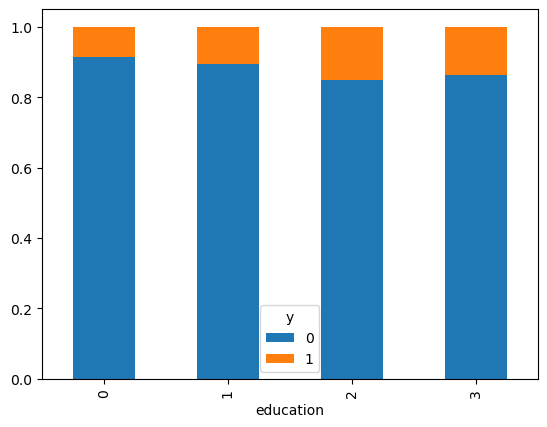

In [ ]:
ct_eud.plot(kind='bar',stacked=True)

In [ ]:
ct_def= pd.crosstab(index=df['default'],
           columns=df['y'],
           values=df['y'],
           aggfunc='count',
        normalize='index').round(3)
ct_def

y,0,1
default,,
0,0.882,0.118
1,0.936,0.064


<Axes: xlabel='default'>

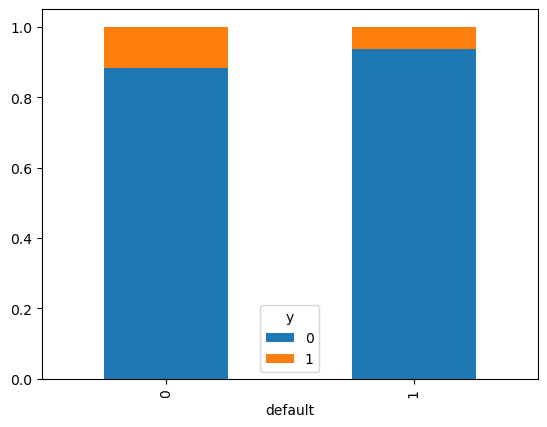

In [ ]:
ct_def.plot(kind='bar',stacked=True)

In [ ]:
ct_loan= pd.crosstab(index=df['loan'],
           columns=df['y'],
           values=df['y'],
           aggfunc='count',
        normalize='index').round(3)
ct_loan

y,0,1
loan,,
0,0.873,0.127
1,0.933,0.067


<Axes: xlabel='loan'>

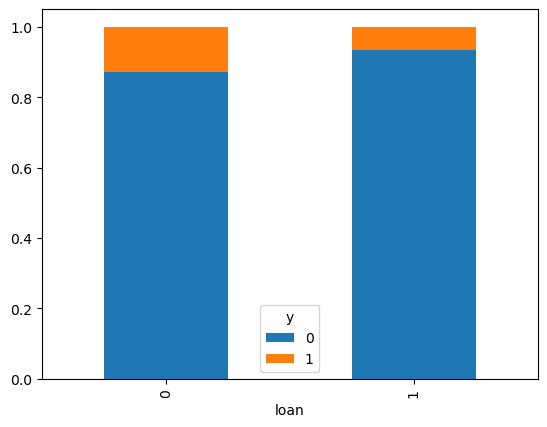

In [ ]:
ct_loan.plot(kind='bar',stacked=True)

In [ ]:
ct_pout= pd.crosstab(index=df['poutcome'],
           columns=df['y'],
           values=df['y'],
           aggfunc='count',
        normalize='index').round(3)
ct_pout

y,0,1
poutcome,,
0,0.874,0.126
1,0.833,0.167
2,0.353,0.647
3,0.908,0.092


<Axes: xlabel='loan'>

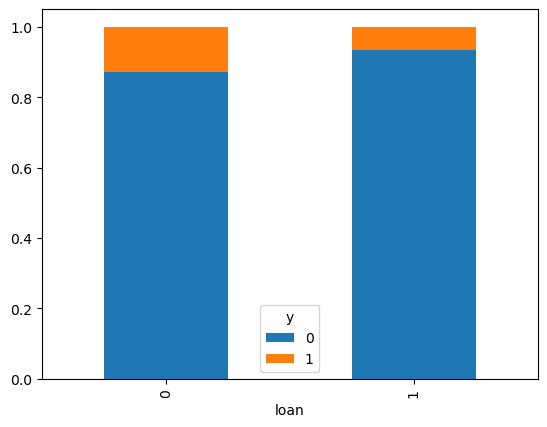

In [ ]:
ct_loan.plot(kind='bar',stacked=True)

# Model Building

In [ ]:
df.drop(['job'],axis=1,inplace=True)

In [ ]:
X=df.iloc[:,:-1]
X

,age,marital,education,default,balance,housing,loan,month,duration,campaign,pdays,previous,poutcome
0,58,1,2,0,2143,1,0,8,261,1,-1,0,3
1,44,2,1,0,29,1,0,8,151,1,-1,0,3
2,33,1,1,0,2,1,1,8,76,1,-1,0,3
3,47,1,3,0,1506,1,0,8,92,1,-1,0,3
4,33,2,3,0,1,0,0,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,2,0,825,0,0,9,977,3,-1,0,3
45207,71,0,0,0,1729,0,0,9,456,2,-1,0,3
45208,72,1,1,0,5715,0,0,9,1127,5,184,3,2
45209,57,1,1,0,668,0,0,9,508,4,-1,0,3


In [ ]:
Y=df['y']
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int8

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=smf.ols(formula="y~x", data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [ ]:
vif_cal(X)

age  VIF =  1.27
marital  VIF =  1.22
education  VIF =  1.04
default  VIF =  1.01
balance  VIF =  1.03
housing  VIF =  1.16
loan  VIF =  1.02
month  VIF =  1.1
duration  VIF =  1.01
campaign  VIF =  1.03
pdays  VIF =  3.85
previous  VIF =  1.33
poutcome  VIF =  4.01


In [ ]:
logreg = sm.Logit(Y,sm.add_constant(X))
lg=logreg.fit()

Optimization terminated successfully.
         Current function value: 0.274734
         Iterations 7


In [ ]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45197
Method:                           MLE   Df Model:                           13
Date:                Thu, 12 Oct 2023   Pseudo R-squ.:                  0.2387
Time:                        18:08:48   Log-Likelihood:                -12421.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7888      0.140    -27.074      0.000      -4.063      -3.515
age            0.0052      0.002      3.129      0.002       0.002       0.008
marital        0.2287      0.031      7.448      0.0

In [ ]:
lg_coef = pd.DataFrame(lg.params,columns=['coef'])
lg_coef

,coef
const,-3.788786
age,0.005199
marital,0.228650
education,0.228290
default,-0.366437
balance,0.000020
housing,-1.168264
loan,-0.664934
month,-0.001045
duration,0.003887


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.29,random_state=123)

In [ ]:
df.shape

(45211, 14)

In [ ]:
x_train.shape

(32099, 13)

In [ ]:
x_test.shape

(13112, 13)

In [ ]:
y_train.shape

(32099,)

In [ ]:
y_test.shape

(13112,)

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_train_pred = model.predict(x_train)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [ ]:
metrics.accuracy_score(y_train,y_train_pred )

0.8875977444780211

In [ ]:
y_test_pred = model.predict(x_test)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [ ]:
metrics.accuracy_score(y_test,y_test_pred )

0.889261744966443

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[11403,   194],
       [ 1258,   257]], dtype=int64)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

In [ ]:
print(tn, fp, fn, tp )

11403 194 1258 257


In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11597
           1       0.57      0.17      0.26      1515

    accuracy                           0.89     13112
   macro avg       0.74      0.58      0.60     13112
weighted avg       0.86      0.89      0.86     13112



In [ ]:
y_pred_prob = model.predict_proba(x_test)
print(y_pred_prob)

[[0.88249762 0.11750238]
 [0.92720769 0.07279231]
 [0.89944325 0.10055675]
 ...
 [0.75826919 0.24173081]
 [0.93065326 0.06934674]
 [0.95387137 0.04612863]]


In [ ]:
#AUC Value
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_test_pred)
logit_roc_auc

0.5764542497191859

(0.0, 1.05)

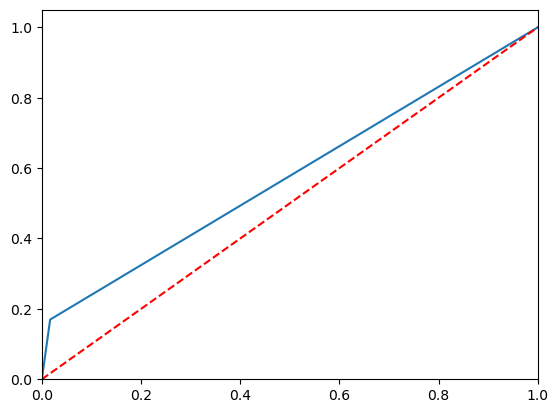

In [ ]:
#Plotting the ROC Curve
fpr, tpr, threshold = roc_curve(y_test, y_test_pred)
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

In [ ]:
 #Predict the probability value for X
pred_proba_df = pd.DataFrame(y_pred_prob)
pred_proba_df

,0,1
0,0.882498,0.117502
1,0.927208,0.072792
2,0.899443,0.100557
3,0.924246,0.075754
4,0.982740,0.017260
...,...,...
13107,0.903236,0.096764
13108,0.936137,0.063863
13109,0.758269,0.241731
13110,0.930653,0.069347



******** For i = 0.2 ******
              precision    recall  f1-score   support

           0       0.93      0.89      0.91     11597
           1       0.37      0.49      0.42      1515

    accuracy                           0.85     13112
   macro avg       0.65      0.69      0.67     13112
weighted avg       0.87      0.85      0.85     13112



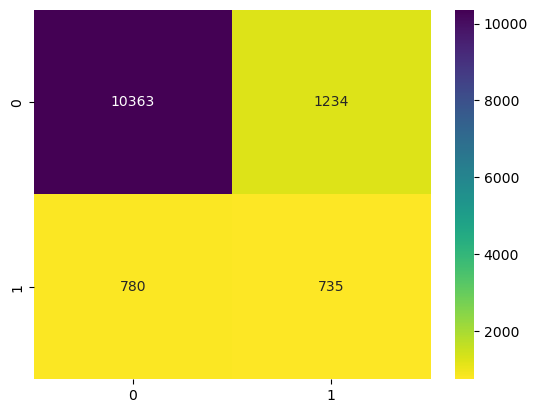

 Printing this at the end 

******** For i = 0.3 ******
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     11597
           1       0.48      0.34      0.40      1515

    accuracy                           0.88     13112
   macro avg       0.70      0.64      0.66     13112
weighted avg       0.87      0.88      0.87     13112



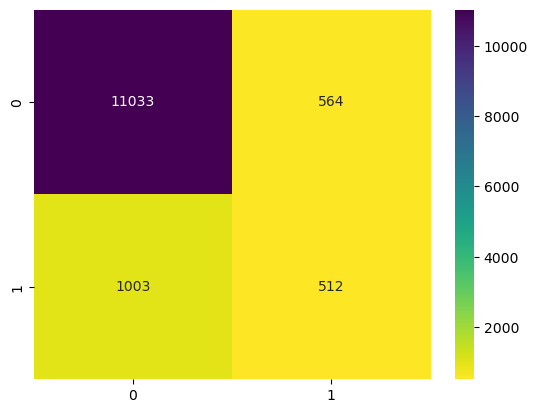

 Printing this at the end 

******** For i = 0.4 ******
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11597
           1       0.53      0.23      0.32      1515

    accuracy                           0.89     13112
   macro avg       0.72      0.60      0.63     13112
weighted avg       0.86      0.89      0.87     13112



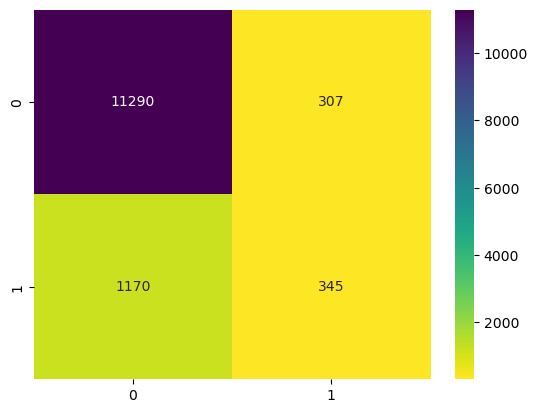

 Printing this at the end 

******** For i = 0.5 ******
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11597
           1       0.57      0.17      0.26      1515

    accuracy                           0.89     13112
   macro avg       0.74      0.58      0.60     13112
weighted avg       0.86      0.89      0.86     13112



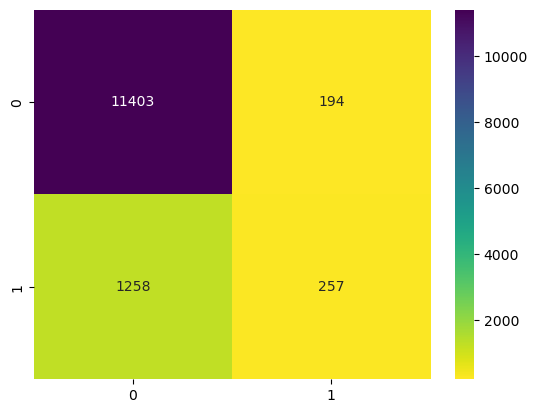

 Printing this at the end 

******** For i = 0.6 ******
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11597
           1       0.59      0.12      0.19      1515

    accuracy                           0.89     13112
   macro avg       0.74      0.55      0.57     13112
weighted avg       0.86      0.89      0.85     13112



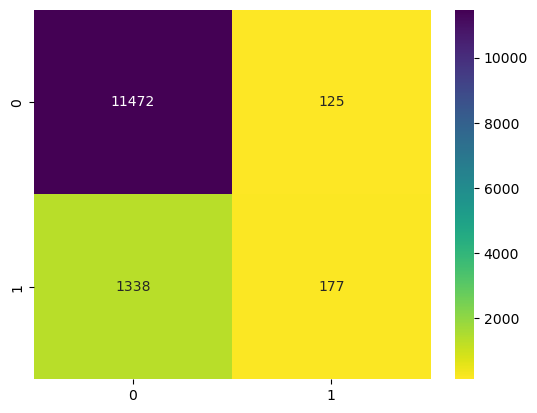

 Printing this at the end 

******** For i = 0.7 ******
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11597
           1       0.62      0.09      0.15      1515

    accuracy                           0.89     13112
   macro avg       0.76      0.54      0.55     13112
weighted avg       0.86      0.89      0.85     13112



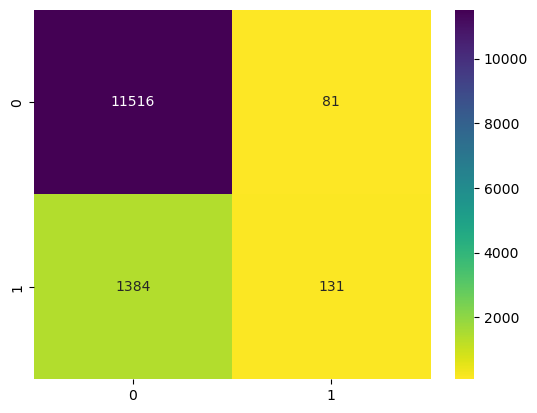

 Printing this at the end 

******** For i = 0.8 ******
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     11597
           1       0.62      0.05      0.10      1515

    accuracy                           0.89     13112
   macro avg       0.75      0.52      0.52     13112
weighted avg       0.86      0.89      0.84     13112



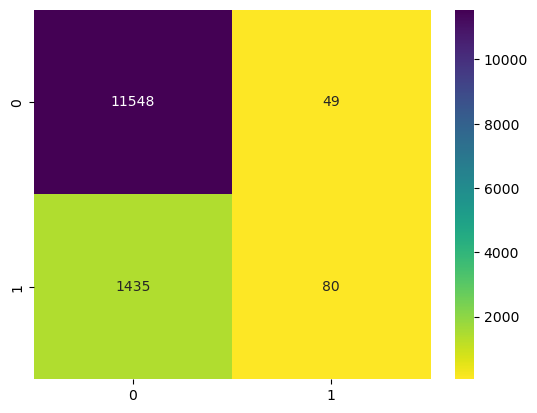

 Printing this at the end 


In [ ]:
# Use Cut-off value to predict the recall_score and accuracy_score.
cutoff_list = [0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for i in cutoff_list:
    print ('\n******** For i = {} ******'.format(i))
    y_pred = pd.DataFrame(np.where(pred_proba_df.iloc[:,1:2] > i, 1, 0))
    test_recall_score = metrics.recall_score(y_test, y_pred)
    test_acu_score = metrics.roc_auc_score(y_test, y_pred)
    test_precision_score = metrics.precision_score(y_test, y_pred)
    print(metrics.classification_report(y_test, y_pred))
    sns.heatmap((metrics.confusion_matrix(y_test, y_pred)),annot=True,fmt='.5g',cmap='viridis_r')
    plt.show()
    print(" Printing this at the end ")